# Real Estate Project

##### Research on apartment sales ads

The goal is to learn how to determine the market value of real estate properties. The task is to define the parameters to make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. 


## Content plan

1. [Step1](#Step1) Opening the data file and studing the general information
2. [Step2](#Step2) Data preprocessing
3. [Step3](#Step3) Making calculations and adding them to the table
4. [Step4](#Step4) EDA 
5. [Overall conclusion](#oc)

### Step1 

In [2]:
import pandas as pd
estate_data = pd.read_csv('real_estate_data_us2.csv', sep=';')
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null object
days_listed          20518 non-null float64
last_price           23699 non-null int64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            9110 non-

So far i assume it would be needed to change data types in Floors_total and Date_posted. It seems there are many columns with missing values

In [3]:
estate_data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


In [4]:
estate_data.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,20518.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,12180.000000,14504.000000,23613.000000,23699.000000,23699.000000,18157.000000,18180.000000,8079.000000,18181.000000,9110.000000,18181.000000
mean,180.888634,1.308310e+05,2.070636,10.569807,34.457852,60.348651,1.150082,2.771499,10.673824,5.892358,9.858475,28793.672193,14191.277833,490.804555,0.611408,517.980900,0.770255
std,219.727988,2.177403e+05,1.078405,5.905438,22.030445,35.654083,1.071300,1.261056,6.597173,4.885249,5.682529,12630.880622,8608.386210,342.317995,0.802074,277.720643,0.938346
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.520000,5.000000,2.000000,6.000000,18585.000000,9238.000000,288.000000,0.000000,294.000000,0.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,1.000000,2.650000,9.000000,4.000000,9.000000,26726.000000,13098.500000,455.000000,0.000000,502.000000,1.000000
75%,232.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,2.000000,2.800000,16.000000,8.000000,14.000000,37273.000000,16293.000000,612.000000,1.000000,729.000000,1.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


There is quite weird min value in Ceiling_height, 1 m high can't be right.

### Conclusion

The data is quite corrupted. We would need to change data types in a few columns, to process missing values before starting analysis.

### Step2

Since we don't need all the columns for analysis, i will process only that ones i need. I will start with missing values in Days_listed

In [5]:
estate_data['days_listed'].isnull().sum()

3181

Since there are some extreme values in the column, i assume, it's a good idea to fill cells with missing values with the median

In [6]:
days_listed_median = estate_data['days_listed'].median()
days_listed_median

95.0

In [7]:
estate_data['days_listed'] = estate_data['days_listed'].fillna(value = days_listed_median)
estate_data['days_listed'].isnull().sum()

0

Next step is to fix Living_area and kitchen_area columns. Since there are quite different total areas in different flats, i can't just replace missing values with mean or median. Should try to find median ratios between total area and kitchen and total area and living area.

In [8]:
estate_data['living_ratio'] = estate_data['living_area'] / estate_data['total_area']
estate_data['living_ratio'].median()

0.5678598992678503

In [9]:
estate_data_living_median = estate_data['total_area'] * estate_data['living_ratio'].median()
estate_data_living_median.head()

0    61.328869
1    22.941540
2    31.800154
3    90.289724
4    56.785990
Name: total_area, dtype: float64

In [10]:
estate_data['living_area'] = estate_data['living_area'].fillna(value=estate_data_living_median)
estate_data['living_area'].isnull().sum()

0

In [11]:
estate_data['kitchen_ratio'] = estate_data['kitchen_area'] / estate_data['total_area']
estate_data['kitchen_ratio'].median()
estate_data_kitchen_median = estate_data['total_area'] * estate_data['kitchen_ratio'].median()
estate_data['kitchen_area'] = estate_data['kitchen_area'].fillna(value=estate_data_kitchen_median)
estate_data['kitchen_area'].isnull().sum()

0

In [12]:
estate_data['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [13]:
estate_data['ceiling_height'].isnull().sum()

9195

Ceiling_height contains some strange values, like 100m or 1m, and there are 9195 missing values, quite a big number. So far we can say, what was the reason of such extreme values, maybe just a typo during the input, so i'm going to replace cells with missing values with the median value of the column.

In [14]:
estate_ceiling_height_median = estate_data['ceiling_height'].median()
estate_ceiling_height_median

2.65

In [15]:
estate_data['ceiling_height'] = estate_data['ceiling_height'].fillna(value=estate_ceiling_height_median)
estate_data['ceiling_height'].isnull().sum()

0

In [16]:
estate_data['floors_total'].isnull().sum()

86

Since i can't find out what is the total floors number for each building, and there are only 86 cells with missing values, i would try to fill it with the median value.

In [17]:
estate_floors_total_median = estate_data['floors_total'].median()
estate_floors_total_median

9.0

In [18]:
estate_data['floors_total'] = estate_data['floors_total'].fillna(value=estate_floors_total_median)
estate_data['floors_total'].isnull().sum()

0

For convenience of usage of data i will use .st.lower() method in Locality_name column 

In [19]:
estate_data['locality_name'] = estate_data['locality_name'].str.lower()
estate_data['locality_name'].value_counts()

saint petersburg           15721
murino village               556
shushary village             440
vsevolozhsk                  398
pushkin                      369
                           ...  
sadko village                  1
kotly village                  1
lesnaya polyana village        1
gladkoye village               1
rappolovo village              1
Name: locality_name, Length: 326, dtype: int64

In [20]:
estate_data.duplicated().sum()

0

In [21]:
estate_data['locality_name'].isnull().sum()

49

As we see, there are a few cells with missing values in this column, i will fill it with STp value, because the number of ads from STp is quite big, and in that case it will not affect the results.

In [22]:
estate_data['locality_name'] = estate_data['locality_name'].fillna(value='saint petersburg')
estate_data['locality_name'].isnull().sum()

0

So far i need to change the data type in the Floors_total and Date_posted columns

In [23]:
estate_data['floors_total'] = estate_data['floors_total'].astype(int)

In [24]:
estate_data['date_posted'] = pd.to_datetime(estate_data['date_posted'])
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
date_posted          23699 non-null datetime64[ns]
days_listed          23699 non-null float64
last_price           23699 non-null int64
bedrooms             23699 non-null int64
kitchen_area         23699 non-null float64
living_area          23699 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       23699 non-null float64
floors_total         23699 non-null int64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23699 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            911

### Step3

Let's make some calculations. First price per square meter.

In [26]:
estate_data['price_per_meter'] = estate_data['last_price'] / estate_data['total_area']
estate_data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,living_ratio,kitchen_ratio,price_per_meter
0,2019-03-07,95.0,260000,3,25.000000,51.000000,108.0,NaN,2.70,16,...,saint petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0,0.472222,0.231481,2407.407407
1,2018-12-04,81.0,67000,1,11.000000,18.600000,40.4,2.0,2.65,11,...,shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0,0.460396,0.272277,1658.415842
2,2015-08-20,558.0,103920,2,8.300000,34.300000,56.0,0.0,2.65,5,...,saint petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0,0.612500,0.148214,1855.714286
3,2015-07-24,424.0,1298000,3,27.413793,90.289724,159.0,0.0,2.65,14,...,saint petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0,NaN,NaN,8163.522013
4,2018-06-19,121.0,200000,2,41.000000,32.000000,100.0,NaN,3.03,14,...,saint petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0,0.320000,0.410000,2000.000000


Second: day, month and year of publication. After changing data type to datetime type i can use dt.weekday, dt.month and dt.year

In [27]:
estate_data['day_posted'] = estate_data['date_posted'].dt.weekday
estate_data['day_posted'].head()

0    3
1    1
2    3
3    4
4    1
Name: day_posted, dtype: int64

In [28]:
estate_data['month_posted'] = estate_data['date_posted'].dt.month
estate_data['month_posted'].head()

0     3
1    12
2     8
3     7
4     6
Name: month_posted, dtype: int64

In [29]:
estate_data['year_posted'] = estate_data['date_posted'].dt.year
estate_data['year_posted'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_posted, dtype: int64

In [30]:
def floor_grouped(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'first'
    elif floor != 1:
        if floor == floors_total:
            return 'last'
        else:
            return 'other'

estate_data['floor_grouped'] = estate_data.apply(floor_grouped, axis=1)
estate_data.groupby('floor_grouped')['floor'].count()


floor_grouped
first     2917
last      3341
other    17441
Name: floor, dtype: int64

In [31]:
first_floor_check = estate_data.query('floor == 1')
first_floor_check.shape[0]

2917

I already have columns with living and kitchen ratios, but there are missing values because i'd counted them before i filled in missing values in living_area and kitchen_area. So i will repeat the code to count it again with all values.

In [32]:
estate_data['living_ratio'] = estate_data['living_area'] / estate_data['total_area']
estate_data['kitchen_ratio'] = estate_data['kitchen_area'] / estate_data['total_area']
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
date_posted          23699 non-null datetime64[ns]
days_listed          23699 non-null float64
last_price           23699 non-null int64
bedrooms             23699 non-null int64
kitchen_area         23699 non-null float64
living_area          23699 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       23699 non-null float64
floors_total         23699 non-null int64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23699 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            911

### Step4

Now i need to investigate the data in Total_area, Ceiling_height, Bedrooms and Last_price. Let's begin with Total_area

In [33]:
estate_data['total_area'].describe()


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

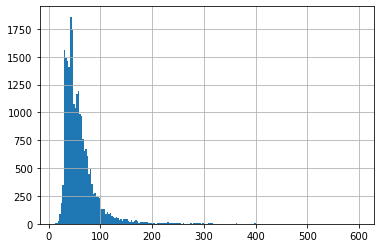

In [34]:
estate_data['total_area'].hist(bins=200, range=(12, 600))

In [35]:
estate_data.sort_values(by='total_area', ascending=False).head(10)

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,parks_within_3000,pond_dist,ponds_within_3000,living_ratio,kitchen_ratio,price_per_meter,day_posted,month_posted,year_posted,floor_grouped
19540,2017-12-06,106.0,8400000,12,112.000000,409.700000,900.0,NaN,2.80,25,...,0.0,318.0,2.0,0.455222,0.124444,9333.333333,2,12,2017,last
12859,2019-04-09,95.0,2800000,7,19.500000,322.300000,631.2,1.0,3.90,4,...,0.0,210.0,2.0,0.510615,0.030894,4435.994930,1,4,2019,last
3117,2019-03-30,95.0,2800000,7,60.000000,358.319596,631.0,NaN,2.65,5,...,0.0,210.0,2.0,0.567860,0.095087,4437.400951,5,3,2019,last
15651,2017-12-18,111.0,6000000,7,70.000000,258.000000,618.0,NaN,3.40,7,...,0.0,198.0,2.0,0.417476,0.113269,9708.737864,0,12,2017,other
5358,2019-02-14,14.0,1300000,15,100.000000,409.000000,590.0,NaN,3.50,6,...,1.0,NaN,0.0,0.693220,0.169492,2203.389831,3,2,2019,other
4237,2017-10-14,95.0,1000000,7,22.000000,332.000000,517.0,NaN,2.65,4,...,2.0,540.0,2.0,0.642166,0.042553,1934.235977,5,10,2017,other
8018,2015-12-17,1078.0,1680000,5,45.500000,301.500000,507.0,1.0,4.45,7,...,2.0,NaN,0.0,0.594675,0.089744,3313.609467,3,12,2015,last
5893,2017-05-31,50.0,4600000,6,40.000000,283.929950,500.0,0.0,2.65,7,...,0.0,198.0,2.0,0.567860,0.080000,9200.000000,2,5,2017,last
15016,2016-01-13,303.0,3000000,4,86.206897,283.929950,500.0,0.0,3.20,7,...,3.0,531.0,3.0,0.567860,0.172414,6000.000000,2,1,2016,last
12401,2017-06-19,14.0,1830000,7,25.000000,347.500000,495.0,0.0,4.65,7,...,2.0,NaN,0.0,0.702020,0.050505,3696.969697,0,6,2017,last


There are a number of extreme values in the table, but it is difficult to guess how wrong they are. Since the total area in such apartments is correlated with the kitchen area and living area, as well as with the number of rooms, they can hardly be called a typo.

In [36]:
estate_data[estate_data['total_area'] > 120].count()

date_posted          1062
days_listed          1062
last_price           1062
bedrooms             1062
kitchen_area         1062
living_area          1062
total_area           1062
balconies             473
ceiling_height       1062
floors_total         1062
floor                1062
total_images         1062
bike_parking          134
is_studio            1062
is_open_plan         1062
locality_name        1062
airport_dist         1024
city_center_dist     1028
park_dist             687
parks_within_3000    1028
pond_dist             696
ponds_within_3000    1028
living_ratio         1062
kitchen_ratio        1062
price_per_meter      1062
day_posted           1062
month_posted         1062
year_posted          1062
floor_grouped        1062
dtype: int64

Since apartments with an area of more than 120 meters are only about 4%, they can be ignored. I'll create a slice without this data.

In [37]:
estate_data_total_area = estate_data.query('total_area <= 120')
estate_data_total_area.shape[0]

22637

In [38]:
estate_data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

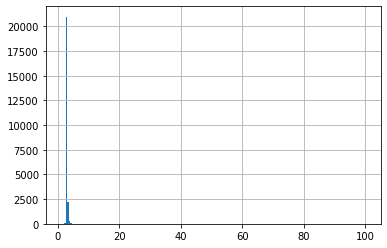

In [39]:
estate_data['ceiling_height'].hist(bins=200, range=(1, 100))

In [40]:
estate_good_data = estate_data_total_area.query('2.50 <= ceiling_height <= 5.00')
estate_good_data.shape[0]

22533

Since the ceiling heights of 1 m and 100 m are definitely unrealistic, perhaps there was some mistake in the data entry process, I sorted the data by the ceiling height, which is adequate, and did this also in the previous slice, so that I could use it later for analysis.

In [41]:
estate_data['bedrooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: bedrooms, dtype: float64

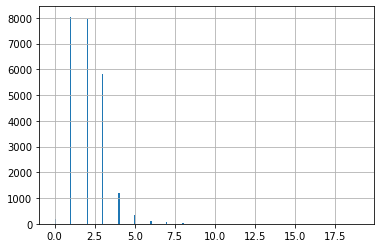

In [42]:
estate_data['bedrooms'].hist(bins=200, range=(0, 19))

19 rooms is a fairly large number, but most likely such values were sorted along with a large area. Let's check. 

In [43]:
estate_good_data['bedrooms'].describe()

count    22533.000000
mean         1.961301
std          0.910329
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: bedrooms, dtype: float64

7 rooms, judging by the histogram, are very rare, but for an apartment of 120 meters - it is quite possible.

In [44]:
estate_good_data.sort_values(by='last_price').head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,parks_within_3000,pond_dist,ponds_within_3000,living_ratio,kitchen_ratio,price_per_meter,day_posted,month_posted,year_posted,floor_grouped
8793,2019-03-20,8.0,244,2,40.500000,32.000000,109.0,NaN,2.75,25,...,1.0,NaN,0.0,0.293578,0.371560,2.238532,2,3,2019,last
14911,2018-06-26,44.0,8600,2,9.310345,30.664435,54.0,NaN,2.65,3,...,NaN,NaN,NaN,0.567860,0.172414,159.259259,1,6,2018,last
17456,2019-04-22,95.0,8600,1,6.000000,16.000000,30.4,NaN,2.65,2,...,NaN,NaN,NaN,0.526316,0.197368,282.894737,0,4,2019,first
16274,2018-07-10,45.0,8800,1,6.896552,22.714396,40.0,NaN,2.65,5,...,NaN,NaN,NaN,0.567860,0.172414,220.000000,1,7,2018,first
17676,2018-02-01,120.0,9000,1,8.500000,17.300000,36.5,1.0,2.65,5,...,NaN,NaN,NaN,0.473973,0.232877,246.575342,3,2,2018,other


In [45]:
estate_good_data.sort_values(by='last_price').tail(10)

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,parks_within_3000,pond_dist,ponds_within_3000,living_ratio,kitchen_ratio,price_per_meter,day_posted,month_posted,year_posted,floor_grouped
12916,2015-06-25,95.0,799800,3,9.0,42.90000,67.7,NaN,3.10,7,...,1.0,202.0,3.0,0.633678,0.132939,11813.884786,3,6,2015,other
6127,2017-07-13,497.0,800000,2,12.0,45.00000,65.3,2.0,4.10,5,...,1.0,283.0,1.0,0.689127,0.183767,12251.148545,3,7,2017,other
7596,2018-02-19,95.0,800000,3,12.0,74.40000,110.0,NaN,3.20,4,...,2.0,93.0,1.0,0.676364,0.109091,7272.727273,0,2,2018,other
5297,2018-11-15,95.0,900000,2,45.0,54.51455,96.0,1.0,3.20,6,...,2.0,569.0,3.0,0.567860,0.468750,9375.000000,3,11,2018,other
11492,2014-12-09,1030.0,928481,2,20.0,54.80000,92.4,1.0,2.65,6,...,2.0,569.0,3.0,0.593074,0.216450,10048.495671,1,12,2014,last
7136,2018-02-01,144.0,960000,3,13.5,61.00000,108.0,NaN,2.65,5,...,1.0,415.0,3.0,0.564815,0.125000,8888.888889,3,2,2018,other
10001,2016-01-19,425.0,990000,3,50.0,47.00000,119.0,0.0,3.30,8,...,3.0,NaN,0.0,0.394958,0.420168,8319.327731,1,1,2016,other
7726,2019-04-18,95.0,1000000,2,28.0,40.00000,93.0,2.0,2.65,7,...,2.0,569.0,3.0,0.430108,0.301075,10752.688172,3,4,2019,other
10011,2019-03-21,40.0,1060000,3,12.0,73.00000,90.0,NaN,3.15,5,...,3.0,564.0,3.0,0.811111,0.133333,11777.777778,3,3,2019,other
6462,2015-12-17,651.0,1640000,3,20.0,78.50000,114.0,0.0,2.65,5,...,2.0,69.0,3.0,0.688596,0.175439,14385.964912,3,12,2015,other


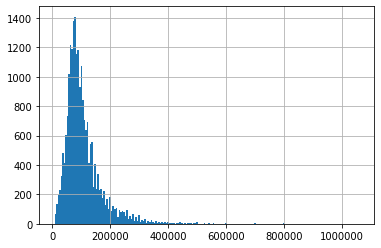

In [46]:
estate_good_data['last_price'].hist(bins=200, range=(8600, 1060000))

There is a significant difference in cost, the most expensive apartment is 123 times more expensive than the cheapest. Perhaps this is due to the location and condition of the apartments. The average cost is somewhere in the region of 80,000-100,000.
Let's determine the average time for which an apartment is sold.

In [47]:
estate_good_data['days_listed'].describe()

count    22533.000000
mean       165.561310
std        201.874161
min          1.000000
25%         45.000000
50%         95.000000
75%        194.000000
max       1580.000000
Name: days_listed, dtype: float64

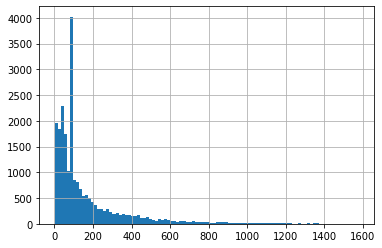

In [48]:
estate_good_data['days_listed'].hist(bins=100, range=(1, 1580))

In [49]:
estate_good_data['days_listed'].mean()

165.56131007855146

In [50]:
estate_good_data['days_listed'].median()

95.0

The average sale period for an apartment is 95 days. Most of the apartments are sold during this period. A sale that takes less time can be considered pretty fast. Quite a few apartments were sold in 45-50 days. Perhaps these were very advantageous offers in terms of price-quality ratio, or favorable credit terms were provided. The term of sale - 1 day is unlikely, perhaps the owner changed his mind about placing the ad and deleted it. Sales longer than 200 days can be considered very long, and owners should probably have revised the price.

Let's check if the ceiling height, the number of rooms, the total area and the floor affect the cost. And also whether the day, month or year of the ad have an affect.

To plot prices by floor, I'll rename first - 1, last - 2, other - 3.

In [51]:
estate_data['floor_grouped'] = estate_data['floor_grouped'].replace('first', 1)
estate_data['floor_grouped'] = estate_data['floor_grouped'].replace('last', 2)
estate_data['floor_grouped'] = estate_data['floor_grouped'].replace('other', 3)
estate_data['floor_grouped'].value_counts()

3    17441
2     3341
1     2917
Name: floor_grouped, dtype: int64

In [52]:
estate_good_data['floor_grouped'] = estate_data['floor_grouped']
estate_good_data['floor_grouped'].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3    16609
2     3095
1     2829
Name: floor_grouped, dtype: int64

In [53]:
estate_good_data_multi = estate_good_data.pivot_table(index='price_per_meter', values=['floor_grouped','ceiling_height','total_area','bedrooms','day_posted', 'month_posted', 'year_posted']).reset_index()   
estate_good_data_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14152 entries, 0 to 14151
Data columns (total 8 columns):
price_per_meter    14152 non-null float64
bedrooms           14152 non-null float64
ceiling_height     14152 non-null float64
day_posted         14152 non-null float64
floor_grouped      14152 non-null float64
month_posted       14152 non-null float64
total_area         14152 non-null float64
year_posted        14152 non-null float64
dtypes: float64(8)
memory usage: 884.6 KB


In [54]:
estate_good_data_multi['bedrooms'] = estate_good_data_multi['bedrooms'].astype(int)
estate_good_data_multi['day_posted'] = estate_good_data_multi['day_posted'].astype(int)
estate_good_data_multi['month_posted'] = estate_good_data_multi['month_posted'].astype(int)
estate_good_data_multi['year_posted'] = estate_good_data_multi['year_posted'].astype(int)
estate_good_data_multi['floor_grouped'] = estate_good_data_multi['floor_grouped'].astype(int)

In [55]:
estate_good_data_multi.corr()

,price_per_meter,bedrooms,ceiling_height,day_posted,floor_grouped,month_posted,total_area,year_posted
price_per_meter,1.000000,-0.085960,0.320007,-0.011664,0.220773,0.002142,0.170639,0.041096
bedrooms,-0.085960,1.000000,0.110472,0.011750,-0.033547,0.004405,0.768749,-0.005043
ceiling_height,0.320007,0.110472,1.000000,-0.025836,0.032706,-0.000799,0.305144,-0.025484
day_posted,-0.011664,0.011750,-0.025836,1.000000,0.009082,0.011984,-0.011867,0.005790
floor_grouped,0.220773,-0.033547,0.032706,0.009082,1.000000,0.019178,0.057428,0.042739
month_posted,0.002142,0.004405,-0.000799,0.011984,0.019178,1.000000,0.013200,-0.266439
total_area,0.170639,0.768749,0.305144,-0.011867,0.057428,0.013200,1.000000,-0.059573
year_posted,0.041096,-0.005043,-0.025484,0.005790,0.042739,-0.266439,-0.059573,1.000000


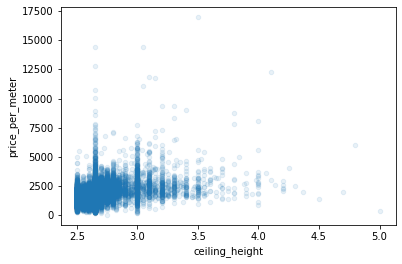

In [56]:
estate_good_data_multi.plot(x='ceiling_height', y='price_per_meter', kind='scatter', alpha=0.1)

The correlation between the cost and the ceiling height is not very large, according to the graph it is noticeable that with an increase in the ceiling height, the minimum cost per square meter increases.

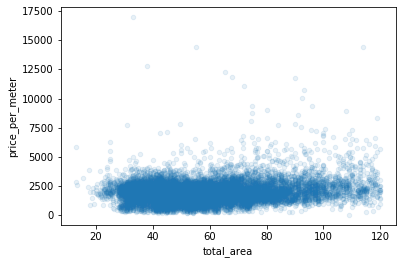

In [57]:
estate_good_data_multi.plot(x='total_area', y='price_per_meter', kind='scatter', alpha=0.1)

There is practically no obvious relationship between the cost and area of an apartment. But we can say that the minimum cost per sq.m. for apartments with an area of more than 75 meters are on average higher than for apartments with a smaller area. Also in larger apartments there're more expensive prices per sq.m.

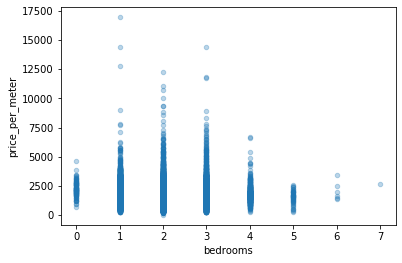

In [98]:
estate_good_data_multi.plot(x='bedrooms', y='price_per_meter', kind='scatter', alpha=0.3)

The correlation coefficient between the cost and the number of rooms is negative and tends to zero -0.08, we can say that there is no dependence. Perhaps this is due to the fact that the area of the apartment does not depend on the number of rooms. An apartment with a large area and high cost may have only 2-3 bedrooms. The negative correlation may be due to the fact that traditionally one-room apartments are slightly more expensive in terms of per sq m than 2- or 3-room apartments.

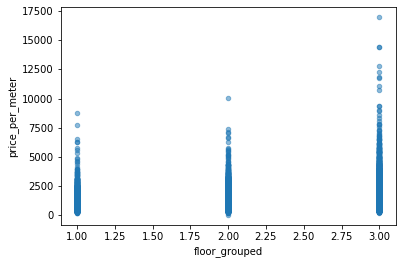

In [99]:
estate_good_data_multi.plot(x='floor_grouped', y='price_per_meter', kind='scatter', alpha=0.5)

Correlation coefficient 0.22 - a slight dependence is present. As we can see from the graph, even in the more expensive segment  the ground floor apartements are on average less expensive than those on other floors. The positions of the apartments on the top floor are slightly better, but also lower than those of the apartments on the other floors.

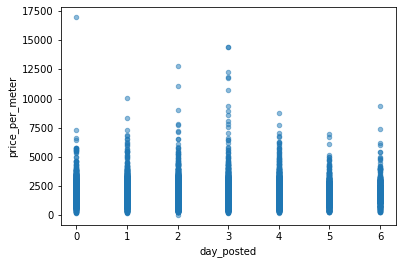

In [100]:
estate_good_data_multi.plot(x='day_posted', y='price_per_meter', kind='scatter', alpha=0.5)

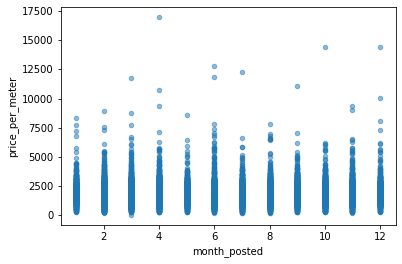

In [101]:
estate_good_data_multi.plot(x='month_posted', y='price_per_meter', kind='scatter', alpha=0.5)

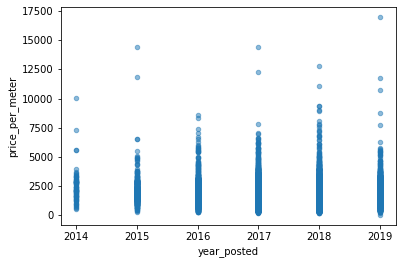

In [102]:
estate_good_data_multi.plot(x='year_posted', y='price_per_meter', kind='scatter', alpha=0.5)

If we consider the day of the week, month and year of ad placement, then the correlation coefficient is almost zero: -0.01, 0.002, 0.04, respectively, so we can talk about the absence of a dependence.

In [103]:
locality_data = estate_good_data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=('median','count')).reset_index()
locality_data.sort_values(by='count', ascending=False).head(10)

,locality_name,count,median
185,saint petersburg,14730,2079.709049
114,murino village,554,1717.563507
201,shushary village,439,1536.585366
303,vsevolozhsk,394,1315.789474
166,pushkin,347,1993.006993
58,kolpino,335,1494.505495
135,pargolovo village,325,1838.351823
26,gatchina,303,1358.490566
74,kudrovo village,299,1837.209302
304,vyborg,230,1167.147720


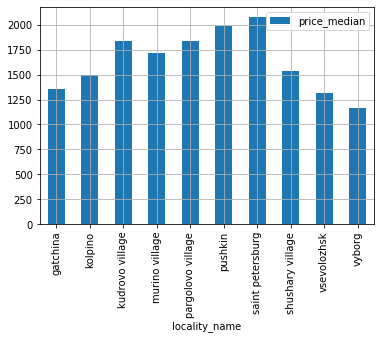

In [104]:
locality_data.columns = ['locality_name', 'add_amount', 'price_median']
(locality_data
 .query('add_amount >= 230')
 .pivot_table(index='locality_name', values='price_median')
 .plot(grid=True, kind='bar'))

As expected, the highest cost per square meter is in St. Petersburg, the cheapest apartments are in Vyborg.

Let's see if the cost varies depending on the distance from the center. I will select the data for St. Petersburg in a separate table.

In [105]:
spb_data = estate_good_data.query('locality_name == "saint petersburg"')
spb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14730 entries, 0 to 23697
Data columns (total 29 columns):
date_posted          14730 non-null datetime64[ns]
days_listed          14730 non-null float64
last_price           14730 non-null int64
bedrooms             14730 non-null int64
kitchen_area         14730 non-null float64
living_area          14730 non-null float64
total_area           14730 non-null float64
balconies            7587 non-null float64
ceiling_height       14730 non-null float64
floors_total         14730 non-null int64
floor                14730 non-null int64
total_images         14730 non-null int64
bike_parking         1720 non-null object
is_studio            14730 non-null bool
is_open_plan         14730 non-null bool
locality_name        14730 non-null object
airport_dist         14654 non-null float64
city_center_dist     14674 non-null float64
park_dist            6611 non-null float64
parks_within_3000    14674 non-null float64
pond_dist            7316

In [106]:
spb_data['city_center_dist'].isnull().sum()

56

56 lines is 0.4% of the total, so I'll just delete those lines.

In [107]:
spb_data=spb_data[spb_data['city_center_dist'].notnull()]
spb_data['city_center_dist'].isnull().sum()

0

I will convert the distance into kilometers.

In [108]:
spb_data['city_center_dist_km'] = (spb_data['city_center_dist'] / 1000).round()
spb_data.sort_values(by='city_center_dist_km').head() 

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,pond_dist,ponds_within_3000,living_ratio,kitchen_ratio,price_per_meter,day_posted,month_posted,year_posted,floor_grouped,city_center_dist_km
3800,2015-07-22,398.0,138000,2,8.200000,28.200000,47.6,0.0,2.65,5,...,142.0,3.0,0.592437,0.172269,2899.159664,2,7,2015,2,0.0
2609,2017-08-24,11.0,144000,3,8.000000,43.000000,80.0,0.0,2.80,4,...,516.0,2.0,0.537500,0.100000,1800.000000,3,8,2017,1,0.0
8677,2017-12-19,35.0,270000,3,22.000000,46.000000,98.0,NaN,3.50,5,...,222.0,3.0,0.469388,0.224490,2755.102041,1,12,2017,3,0.0
9488,2018-07-26,60.0,160000,3,18.275862,60.193149,106.0,NaN,3.40,4,...,38.0,2.0,0.567860,0.172414,1509.433962,3,7,2018,1,0.0
1109,2014-12-09,1572.0,697571,2,20.000000,58.300000,95.8,1.0,2.65,6,...,569.0,3.0,0.608559,0.208768,7281.534447,1,12,2014,3,0.0


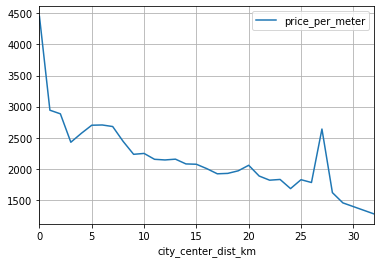

In [109]:
(spb_data
 .pivot_table(index='city_center_dist_km', values='price_per_meter')
 .plot(grid=True))

Based on the data, the city center can be considered an area within a radius of 3 km. Beyond this mark, a more even distribution of prices begins.

In [110]:
spb_center = spb_data.query('city_center_dist_km <= 3')
spb_center_multi = spb_center.pivot_table(index='price_per_meter', values=['floor_grouped','ceiling_height','total_area','bedrooms','day_posted', 'month_posted', 'year_posted']).reset_index()   
spb_center_multi.corr()

,price_per_meter,bedrooms,ceiling_height,day_posted,floor_grouped,month_posted,total_area,year_posted
price_per_meter,1.000000,-0.192100,0.126786,-0.010880,0.131426,0.004324,-0.041670,0.064156
bedrooms,-0.192100,1.000000,0.007011,0.006875,0.096010,-0.044882,0.688964,-0.103608
ceiling_height,0.126786,0.007011,1.000000,-0.039753,0.121670,-0.027339,0.094090,0.071598
day_posted,-0.010880,0.006875,-0.039753,1.000000,-0.005832,0.011995,-0.016828,-0.031012
floor_grouped,0.131426,0.096010,0.121670,-0.005832,1.000000,0.049887,0.161159,0.029066
month_posted,0.004324,-0.044882,-0.027339,0.011995,0.049887,1.000000,-0.043861,-0.238085
total_area,-0.041670,0.688964,0.094090,-0.016828,0.161159,-0.043861,1.000000,-0.110477
year_posted,0.064156,-0.103608,0.071598,-0.031012,0.029066,-0.238085,-0.110477,1.000000


In [111]:
estate_good_data_multi.corr()

,price_per_meter,bedrooms,ceiling_height,day_posted,floor_grouped,month_posted,total_area,year_posted
price_per_meter,1.000000,-0.085960,0.320007,-0.011664,0.220773,0.002142,0.170639,0.041096
bedrooms,-0.085960,1.000000,0.110472,0.011750,-0.033547,0.004405,0.768749,-0.005043
ceiling_height,0.320007,0.110472,1.000000,-0.025836,0.032706,-0.000799,0.305144,-0.025484
day_posted,-0.011664,0.011750,-0.025836,1.000000,0.009082,0.011984,-0.011867,0.005790
floor_grouped,0.220773,-0.033547,0.032706,0.009082,1.000000,0.019178,0.057428,0.042739
month_posted,0.002142,0.004405,-0.000799,0.011984,0.019178,1.000000,0.013200,-0.266439
total_area,0.170639,0.768749,0.305144,-0.011867,0.057428,0.013200,1.000000,-0.059573
year_posted,0.041096,-0.005043,-0.025484,0.005790,0.042739,-0.266439,-0.059573,1.000000


Now we can compare the totals across the entire database and in the center of St. Petersburg.
- Bedrooms -0.08 / -0.19 in the center, there is a slight negative relationship between the number of rooms and the cost. This may be due to the fact that former communal apartments with a large number of rooms are valued less than already renovated apartments. Also, the reason may be that apartments with a small area and one room are quite rare in this area, and their cost per sq m is correspondingly higher.
- Ceiling_height 0.32 / 0.12 The ceiling height practically does not affect the price of an apartment in the city center. Perhaps this is due to the fact that traditionally in central houses, high ceilings are everywhere.
- Total_area 0.17 / -0.04 There is no dependence of the cost on the size of the total area in the center, in contrast to other areas.
- Floor 0.22 / 0.13 number of storeys practically does not affect the cost of an apartment in the center, although there is still a slight dependence.
- The date of placement in both cases does not affect the price in any way.

<a id="oc"></a>

### Overall conclusion

Based on all the data studied, we can say that the location has the greatest influence on the cost of an apartment. 
- So, apartments in St. Petersburg are more expensive than in the nearby suburbs;
- You will pay the most money for an apartment in St. Petersburg if it is located in the city center. Further, the cost decreases fairly evenly in accordance with the distance from the center. 
- At the same time, the area of an apartment and the height of the ceilings practically do not affect the cost, although we noticed that the minimum cost of apartments with a larger area and a higher ceiling is on average higher than that of small apartments.
- The correlation coefficient between the cost and the number of rooms is negative and tends to zero for all data, and slightly increases in the center. This may be due to the fact that former communal apartments with a large number of rooms are valued less than already renovated apartments. Also, the reason may be that apartments with a small area and one room are quite rare in this area, and their cost per sq m is correspondingly higher.
- It can also be said that, on average, apartments on the first and last floors can be cheaper than their counterparts on other floors.
- The date of placement in both cases has no effect on the value.